In [2]:
%matplotlib widget
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_point_clicker import clicker
import pandas as pd
import numpy as np
import math
from shapely.geometry import Point, Polygon, MultiPoint
import shapely.speedups
shapely.speedups.enable() 
#!jupyter nbextension enable --py --sys-prefix ipympl

# READ the pucks exported from RCTD

In [14]:
pucks = {
'F03': "F03_pl.csv",
'SW6': "SW6_pl.csv",
'SW30': "SW30_pl.csv",
'SW31': "SW31_pl.csv",
'SW33': "SW33_pl.csv",
'SW55': "SW55_pl.csv",
'SW56': "SW56_pl.csv"}
wd = './1_ANALYSIS/PL/'
for p in pucks:
    pucks[p] = pd.read_csv(wd+pucks[p],index_col=0)
clickers = {}

# If the puck already has a list of selected cells, load them

In [15]:
wd = './1_ANALYSIS/BC/'
s = 'bc_apr_1'
selbc = {}
for p in pucks.keys():
    selbc[p] = [x.strip() for x in open(f'{wd}{p}_{s}.csv','r').readlines()]
    pucks[p] = pucks[p].assign(sel=0)
    pucks[p].sel[pucks[p].index.isin(selbc[p])] = 1
    

/var/folders/c3/7p4q46xs3yv4_jgf7k4qf_3w0000gn/T/ipykernel_22128/1632252226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pucks[p].sel[pucks[p].index.isin(selbc[p])] = 1


# Render the pucks, if needed click to draw a new area around the cells of interest ( right clik on a point to remove it )

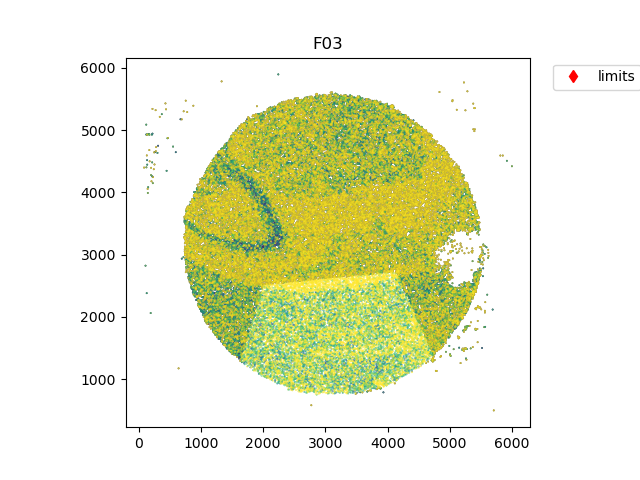

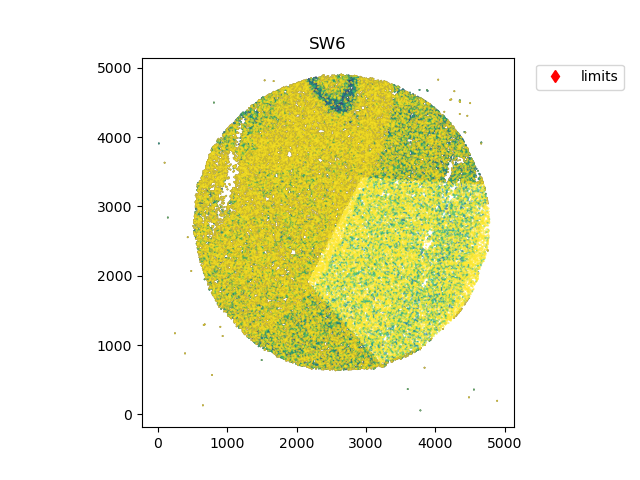

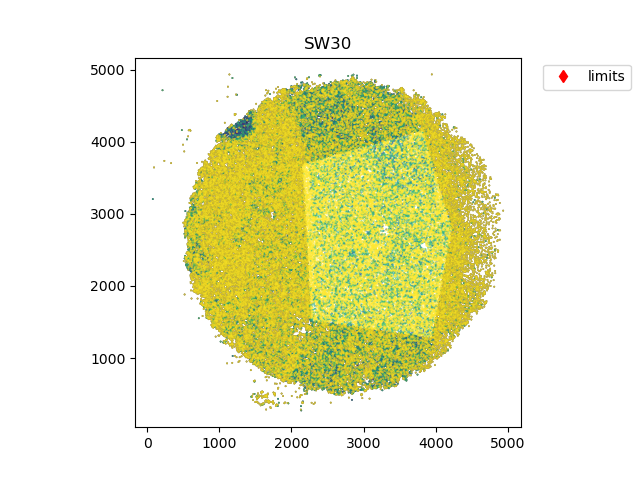

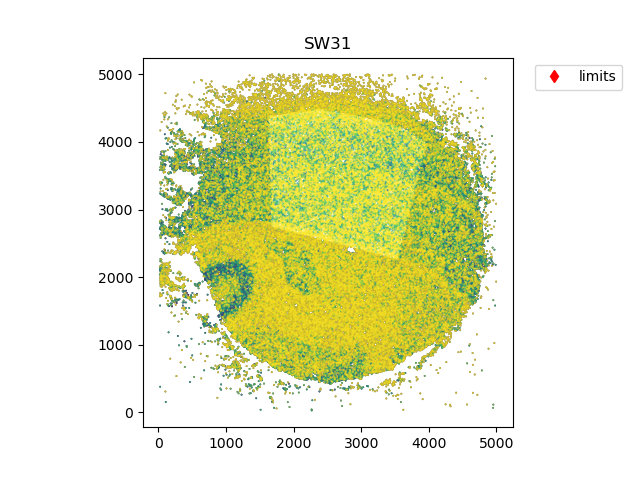

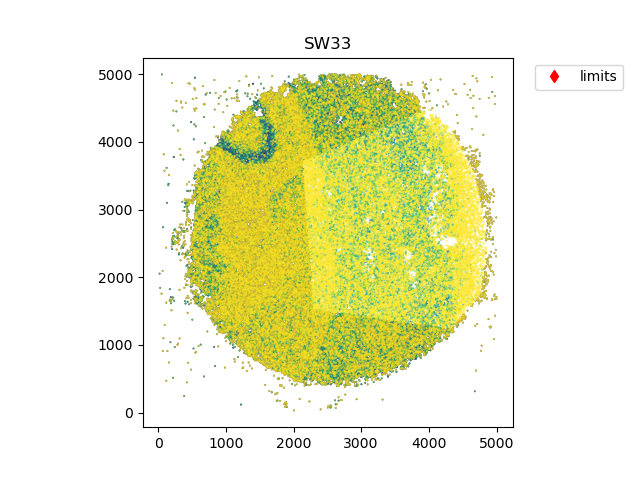

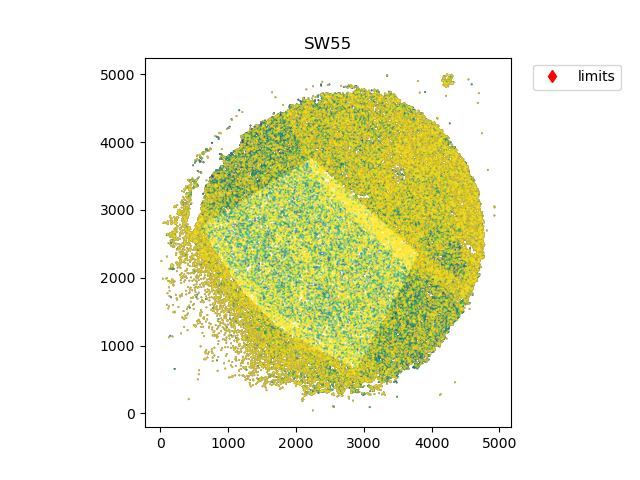

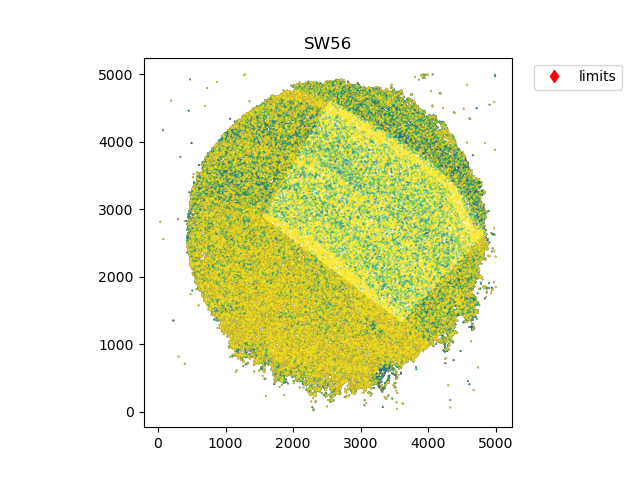

In [16]:
plt.close('all')

gene='Snap25'
for p in pucks:
    fig, ax = plt.subplots()
    ax.scatter(pucks[p].x, pucks[p].y, c = pucks[p]['sel'],s=.1,cmap='hot')
    ax.scatter(pucks[p].x, pucks[p].y, c = pucks[p][gene],s=.1,cmap='viridis_r')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(p)
    clickers[p] = clicker(ax, ['limits'], markers=['d'],colors='red')
    plt.show()

# Tag cells within area of interest

In [5]:
pos = {}
for p in clickers:
    pos[p] = clickers[p].get_positions()

polys = {}
plt.close('all')
for p in pucks:
    poly_c = []
    for k in pos[p]:
        for i in pos[p][k]:
            poly_c.append((i[0],i[1]))
    polys[p] = Polygon(poly_c).convex_hull
    pucks[p]['sel'] = pucks[p].apply(lambda x: polys[p].contains(Point((x[0], x[1]))), axis=1)


# Visual check of selected cells

In [ ]:
for p in pucks:
    fig, ax = plt.subplots()
    ax.scatter(pucks[p].x, pucks[p].y, c = pucks[p].sel, cmap = 'hot',s=.1)
    ax.scatter(pucks[p].x, pucks[p].y, c = pucks[p][gene],s=.1,cmap='viridis_r')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(p)
    plt.grid()


# Write out the selected cells per puck, such that they can be imported back into RCTD

In [44]:
wd = './1_ANALYSIS/BC/'
outf = 'bc_apr_1'
for p in pucks:
   open(f'{wd}{p}_{outf}.csv','w').write('\n'.join(pucks[p][pucks[p].sel].index.tolist()))